<a href="https://colab.research.google.com/github/dtoralg/intro_unsupervised/blob/main/notebooks/E1_Bank_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio de Clustering: Segmentación de Clientes de Tarjetas de Crédito


## Introducción, información previa

Primer ejercicio práctico de clustering. Utilizaremos técnicas de aprendizaje no supervisado para segmentar clientes de tarjetas de crédito en diferentes grupos. Este ejercicio tiene como objetivo identificar patrones y comportamientos similares entre los clientes, lo que puede ser útil para personalizar servicios, detectar anomalías y mejorar estrategias de marketing.

### Objetivos del Ejercicio

- **Comprender los conceptos básicos del clustering** y cómo se aplican en el contexto de datos de clientes.
- **Preprocesar los datos** para asegurarnos de que estén en la forma adecuada para el análisis.
- **Aplicar algoritmos de clustering** como K-Means para agrupar a los clientes en distintos segmentos.
- **Evaluar la calidad de los clusters** utilizando métricas adecuadas.
- **Interpretar los resultados** y extraer insights valiosos que puedan ser utilizados en aplicaciones reales.

### Descripción del Conjunto de Datos

El conjunto de datos que utilizaremos contiene información sobre el comportamiento de gasto de los clientes de tarjetas de crédito. Algunas de las características presentes en el dataset incluyen:

- **CUSTID**: Identification of Credit Card holder
- **BALANCE**: Balance amount left in customer's account to make purchases
- **BALANCE_FREQUENCY**: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- **PURCHASES**: Amount of purchases made from account
- **ONEOFFPURCHASES**: Maximum purchase amount done in one-go
- **INSTALLMENTS_PURCHASES**: Amount of purchase done in installment
- **CASH_ADVANCE**: Cash in advance given by the user
- **PURCHASES_FREQUENCY**: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- **ONEOFF_PURCHASES_FREQUENCY**: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- **PURCHASES_INSTALLMENTS_FREQUENCY**: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- **CASH_ADVANCE_FREQUENCY**: How frequently the cash in advance being paid
- **CASH_ADVANCE_TRX**: Number of Transactions made with "Cash in Advance"
- **PURCHASES_TRX**: Number of purchase transactions made
- **CREDIT_LIMIT**: Limit of Credit Card for user
- **PAYMENTS**: Amount of Payment done by user
- **MINIMUM_PAYMENTS**: Minimum amount of payments made by user
- **PRC_FULL_PAYMENT**: Percent of full payment paid by user
- **TENURE**: Tenure of credit card service for user



### Estructura del Notebook

1. **Importación de Librerías y Carga de Datos:** Preparar el entorno de trabajo e importar el dataset.
2. **Exploración de Datos:** Analizar las características principales y obtener una comprensión inicial de los datos.
3. **Preprocesamiento de Datos:** Limpiar y normalizar los datos para asegurar que sean adecuados para el análisis.
4. **Aplicación del Algoritmo de Clustering:** Implementar K-Means y otros algoritmos de clustering.
5. **Evaluación de Resultados:** Utilizar métricas como el coeficiente de silueta para evaluar la calidad de los clusters.
6. **Visualización e Interpretación:** Graficar los clusters y discutir los insights obtenidos.

### Requisitos

Para seguir este notebook, asegúrate de tener instaladas las siguientes librerías de Python:

- `numpy`
- `pandas`
- `matplotlib`
- `seaborn`
- `scikit-learn`

Puedes instalarlas si trabajas EN LOCAL (no necesario en colab) utilizando el siguiente comando:

```bash
pip install numpy pandas matplotlib seaborn scikit-learn


## Importación de librerías y datos

Para este ejercicio de clustering utilizaremos las librerías usuales de pyhton para exploración de datos pandas, numpy, seaborn, matplotlib

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

NameError: name 'warnings' is not defined

Para generar los cluster implementaremos un proceso de normalizado con las funciones de sklearn StandardScaler y Normalize.

El algoritmo que nos indicará los clusteres será K-Means según visto en temario

In [2]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans

In [3]:
# Ingestión de los datos desde github
creditcard_df = pd.read_csv('https://raw.githubusercontent.com/dtoralg/intro_unsupervised/main/data/credit_card_data.csv')

# Podemos encontrar los datos originales en Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

In [4]:
# Exploramos la forma general del dataset previsualizando algunas filas del mismo
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Análisis exploratorio

In [5]:
creditcard_df.info()
# Apreciamos missing values en algunos campos, y tenemos 18 variables (objetos, float e int) con 8950 observaciones.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

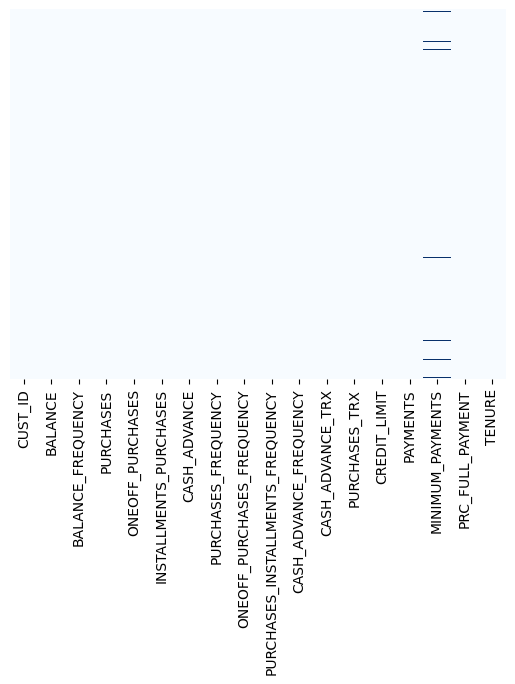

In [7]:
# Evaluamos los campos que tienen missing data
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
creditcard_df.isnull().sum()

In [8]:
# Imputamos los missing values por la media
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()


<Axes: >

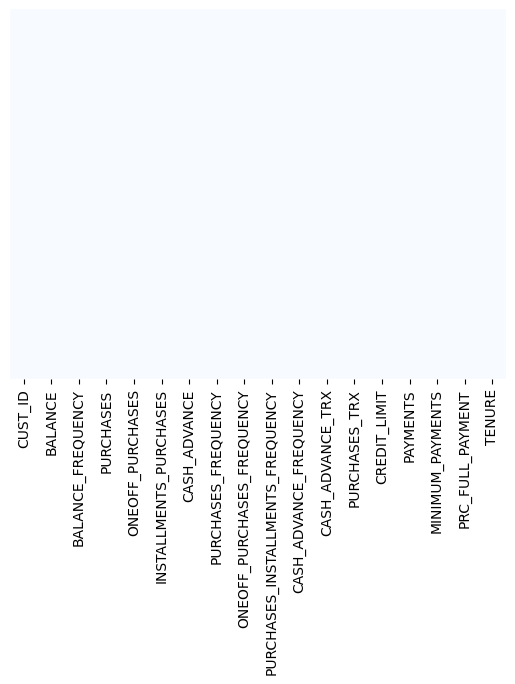

In [9]:
# Re-chequeamos que no sigan existiendo valores null
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [10]:
# Evaluamos valores duplicados en el dataset, confirmamos que no existen valores duplicados
creditcard_df.duplicated().sum()

0

Como 'CUST_ID' es información arbitraria lo excluimos del dataset para no entontrar correlaciones espúreas con otras características

In [11]:
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)

In [12]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Análisis exploratorio: distribución y correlación

Para ello usaremos un histograma (histplot) con KDE (Kernel Density Estimate) habilitado.

Este gráfico nos muestra la distribución y la frecuencia de los valores respecto a la muestra


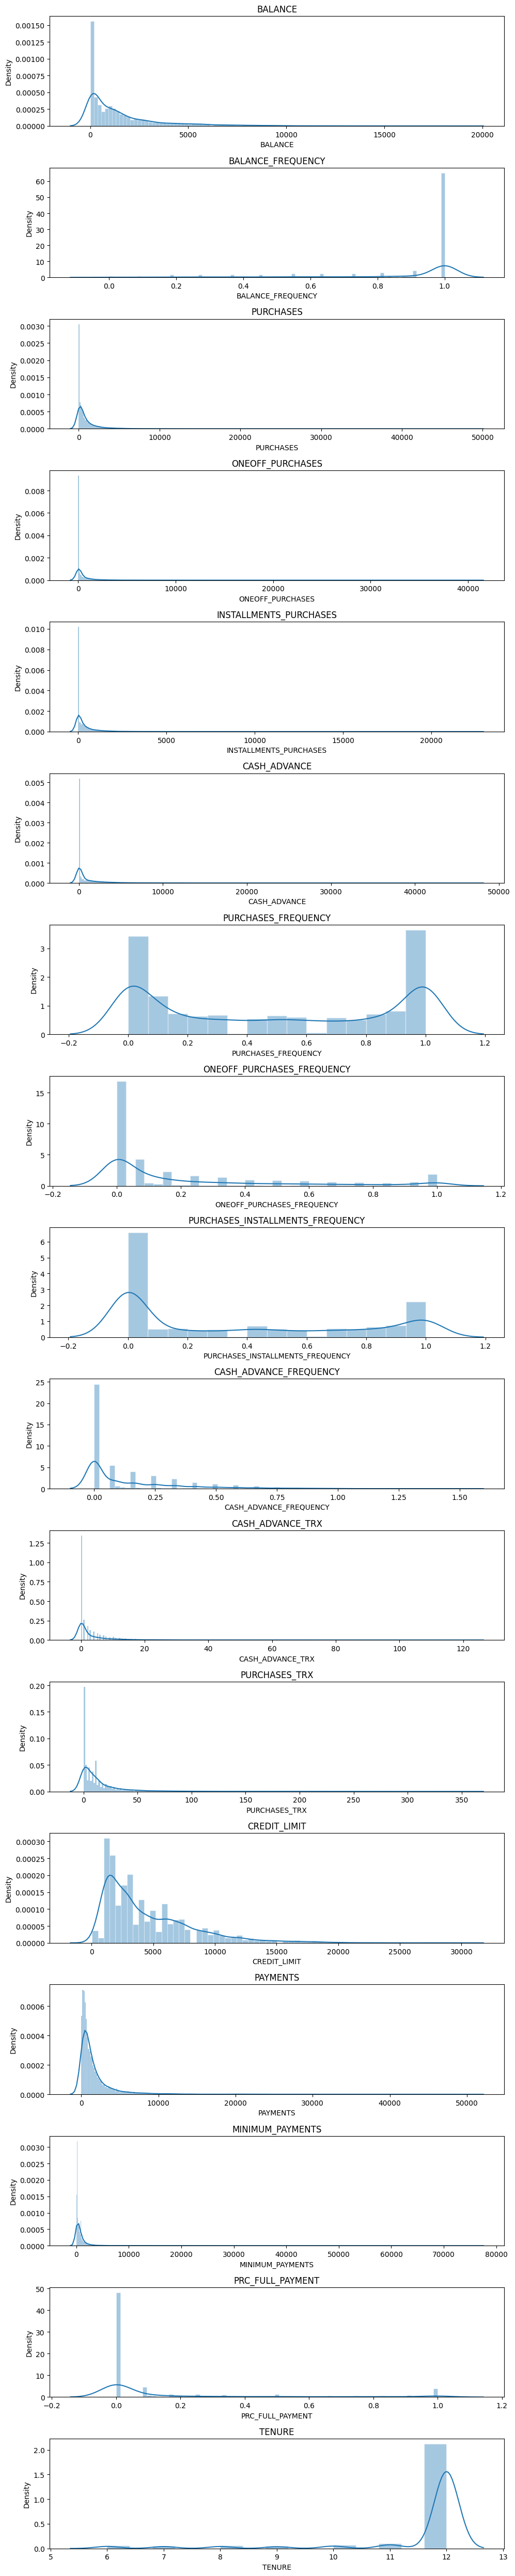

In [22]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.histplot(
      creditcard_df[creditcard_df.columns[i]],
      kde=True,
      stat="density",
      kde_kws=dict(cut=3),
      alpha=.4,
      edgecolor=(1, 1, 1, .4)
)
  plt.title(creditcard_df.columns[i])

plt.tight_layout()


Ejercicio 1: Hallar la media del balance

Ejercicio 1.1: En que valor se agrupa más frecuentemente 'Balance_Frequency'?

Ejercicio 1.2: ¿Cúantos clústeres de valores podemos encontrar a simple vista en 'PURCHASES_FREQUENCY'?

Ejercicio 1.4: 'ONEOFF_PURCHASES_FREQUENCY' qué nos indica? Los usuarios hacen compras únicas o tienden a repetir?

In [ ]:
# Indica tus respuestas aquí


- Obtain the correlation matrix between features

In [ ]:
correlations = creditcard_df.corr()

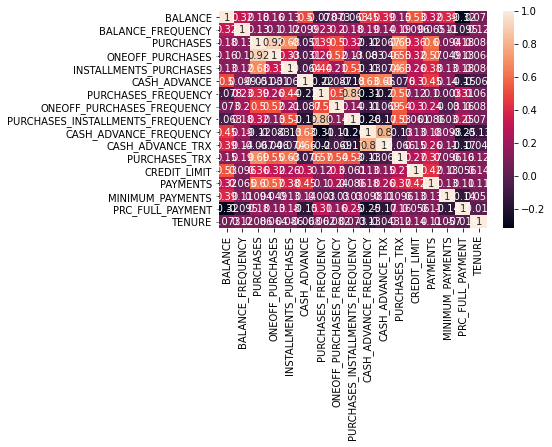

In [ ]:
sns.heatmap(correlations, annot = True)

- Which of the following conditions could terminate the K-means clustering algorithm? (choose 2)
    - K-means terminates after a fixed number of iterations is reached  
    - K-means terminates when the number of clusters does not increase between iterations
    - K-means terminates when the centroid locations do not change between iterations

   


1. K-means terminates after a fixed number of iterations is reached
2. K-means terminates when the centroid locations do not change between iterations

## FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset.
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
- Source:
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [ ]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [ ]:
creditcard_df_scaled.shape

(8950, 17)

In [ ]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [ ]:
# Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
#       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
#       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
#       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
#       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
#       'TENURE'], dtype='object')



# From this we can observe that, 4th cluster seems to be forming the elbow of the curve.
# However, the values does not reduce linearly until 8th cluster.
# Let's choose the number of clusters to be 7 or 8.

In [ ]:
kmeans = KMeans(7)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [ ]:
kmeans.cluster_centers_.shape

(7, 17)

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.646699,0.392636,-0.215364,-0.150822,-0.232208,1.969697,-0.459878,-0.182979,-0.415788,1.894653,1.894516,-0.259300,1.005607,0.801947,0.548592,-0.390628,0.077272
1,-0.341713,-0.333970,-0.280537,-0.207693,-0.281410,0.059408,-0.171041,-0.272006,-0.206438,0.290413,-0.008714,-0.379432,-0.559385,-0.389736,-0.208030,0.026027,-3.176730
2,-0.330328,0.360737,0.071408,-0.042761,0.247101,-0.365659,0.992103,0.288149,0.887060,-0.469244,-0.359073,0.270481,-0.103218,-0.152285,-0.088636,0.357775,0.272879
3,-0.701953,-2.129839,-0.307560,-0.234031,-0.297159,-0.324816,-0.529968,-0.440754,-0.417246,-0.524269,-0.378217,-0.413528,-0.174524,-0.203385,-0.257862,0.285823,0.203039
4,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185151,9.047799,1.030898,1.222264,0.298409
5,0.012514,0.404330,-0.348872,-0.231210,-0.399901,-0.104453,-0.828649,-0.370585,-0.751403,0.086399,-0.040764,-0.472225,-0.305408,-0.250834,-0.003445,-0.456243,0.272391
6,0.683357,0.467024,2.042400,1.680480,1.741776,-0.217624,1.154737,1.753478,1.033094,-0.331801,-0.235995,2.387266,1.198844,1.122987,0.295635,0.404668,0.313354


In [ ]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4991.939359,0.970283,543.076229,342.103716,201.084609,5109.417470,0.305779,0.147872,0.199192,0.514284,16.177508,8.264609,8153.257492,4054.701009,2142.676238,0.039463,11.620728
1,853.228374,0.798156,403.832911,247.710344,156.592050,1103.451827,0.421704,0.121313,0.282394,0.193259,3.189358,5.278560,2459.177542,604.897718,379.400969,0.161327,7.266041
2,876.924097,0.962726,1155.768182,521.463489,634.518308,212.067553,0.888530,0.288418,0.716978,0.041244,0.798419,21.432986,4118.899560,1292.295030,657.643587,0.258358,11.882501
3,103.417920,0.372731,346.097400,203.993322,142.350590,297.717648,0.277649,0.070972,0.198613,0.030233,0.667774,4.431063,3859.459671,1144.364096,263.269244,0.237313,11.789037
4,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667
5,1590.522595,0.973053,257.834816,208.676738,49.442241,759.829001,0.157774,0.091905,0.065811,0.152434,2.970641,2.972073,3383.249791,1007.002609,856.177244,0.020272,11.881847
6,2986.825486,0.987904,5366.824000,3381.690067,1986.133933,522.502605,0.953802,0.725554,0.775015,0.068747,1.638333,74.048333,8856.333333,4984.081773,1553.170944,0.272073,11.936667


In [ ]:
labels.shape # Labels associated to each data point

(8950,)

In [ ]:
labels.max()

6

In [ ]:
labels.min()

0

In [ ]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans


array([2, 3, 6, ..., 5, 5, 5], dtype=int32)

In [ ]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


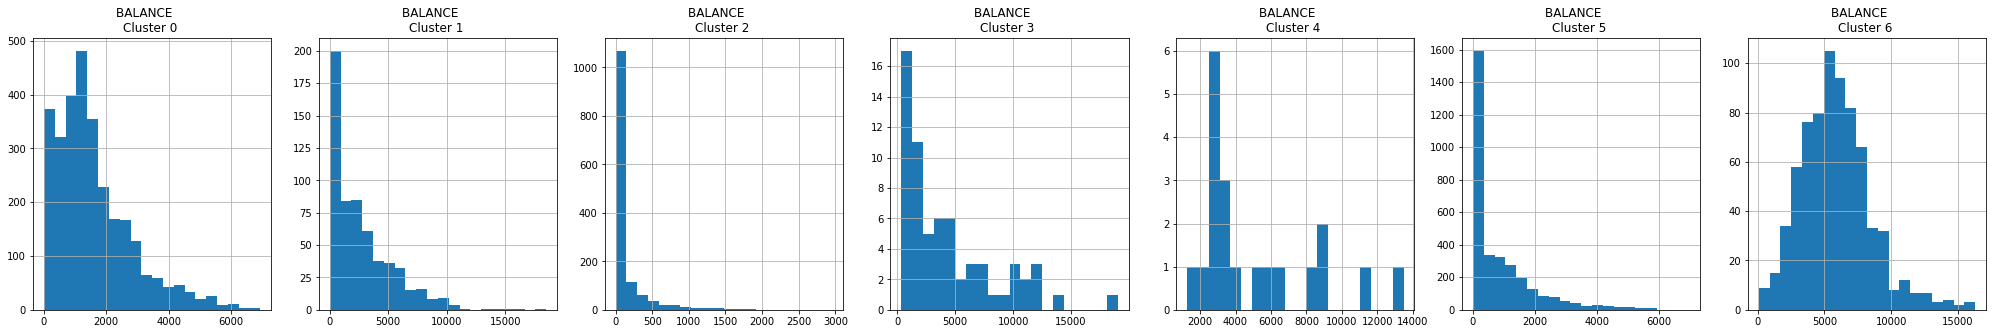

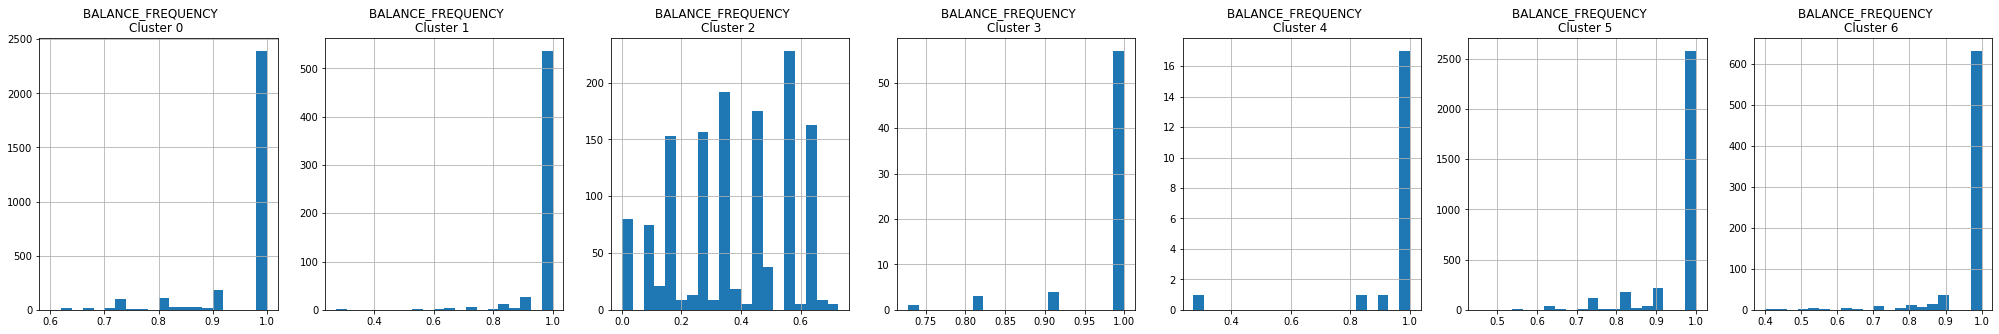

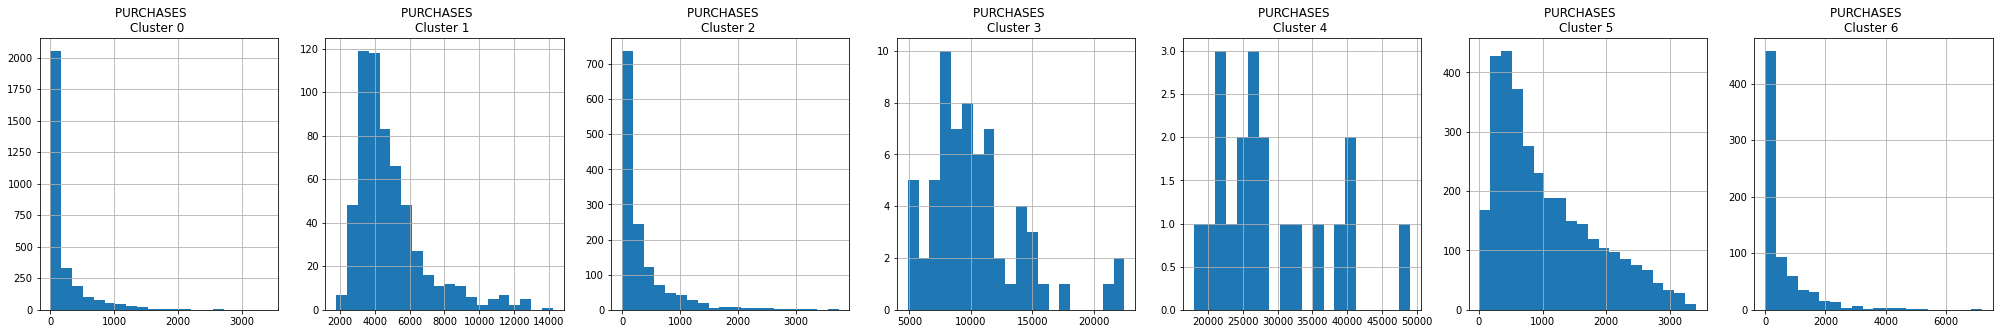

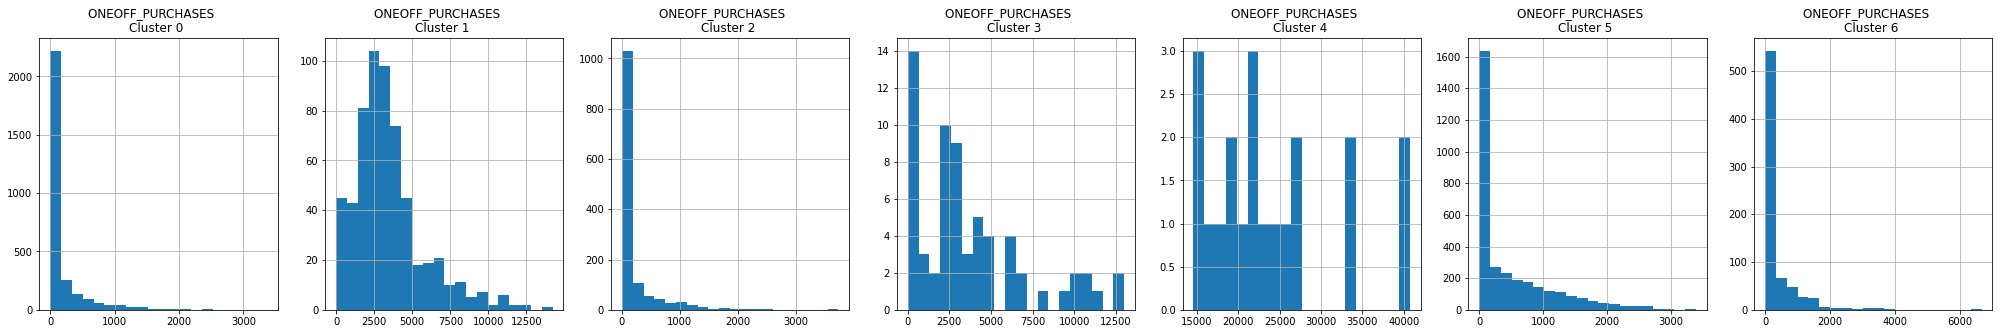

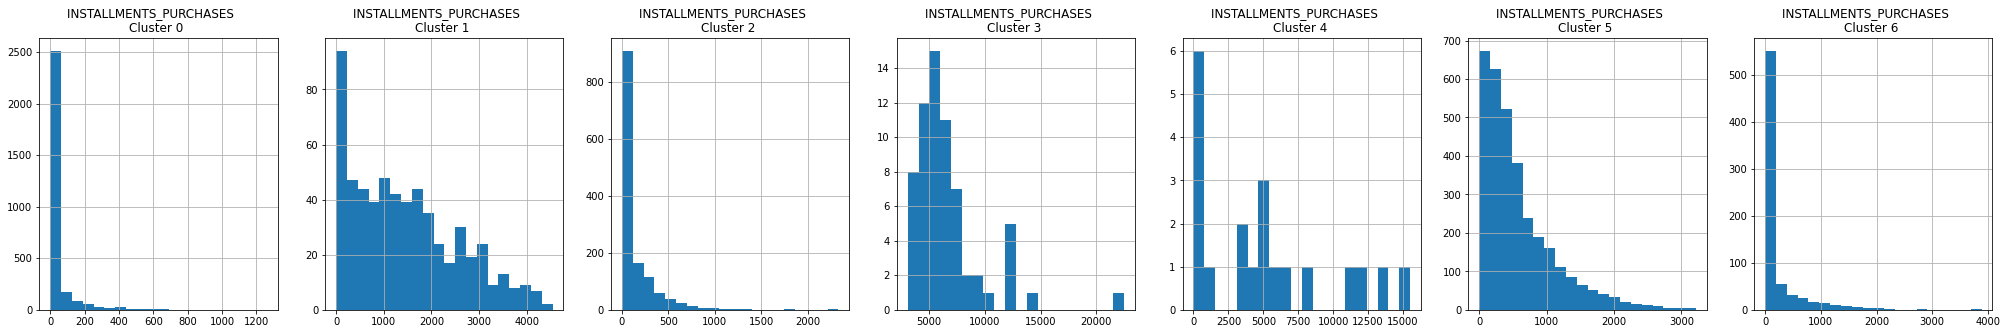

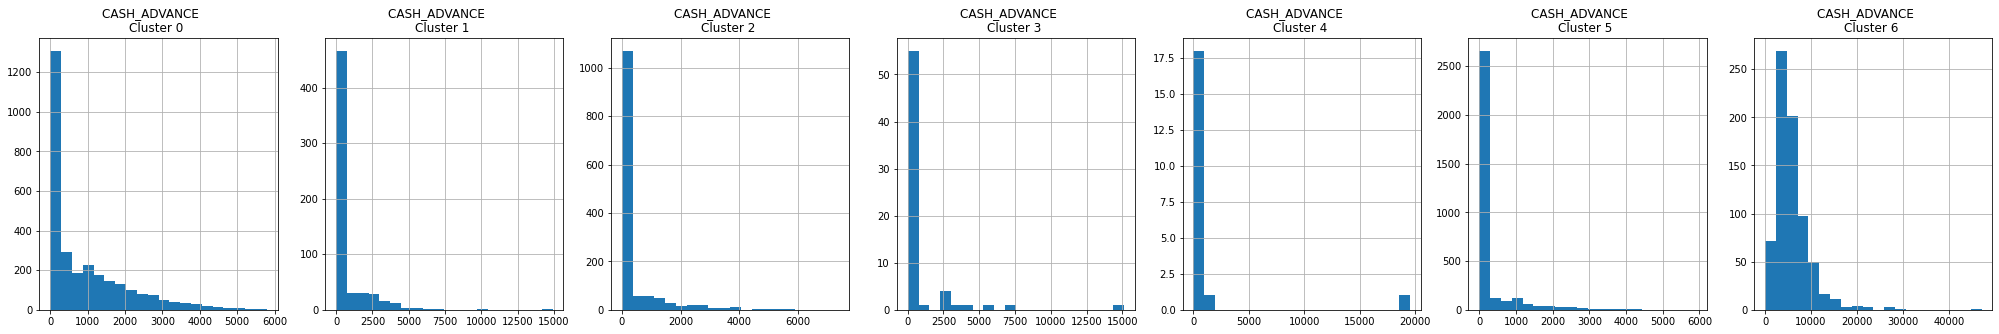

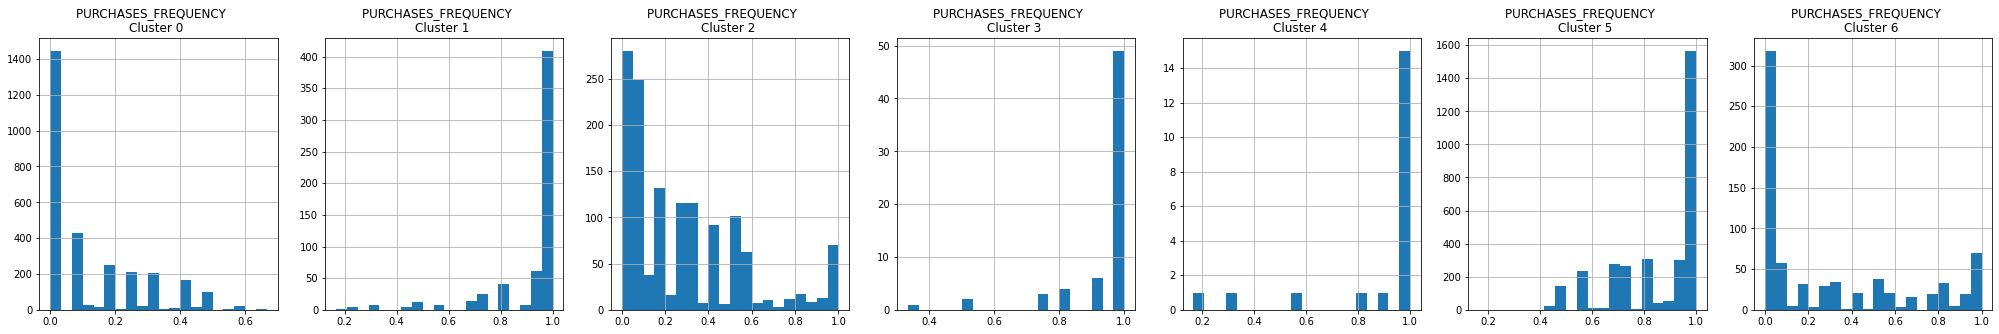

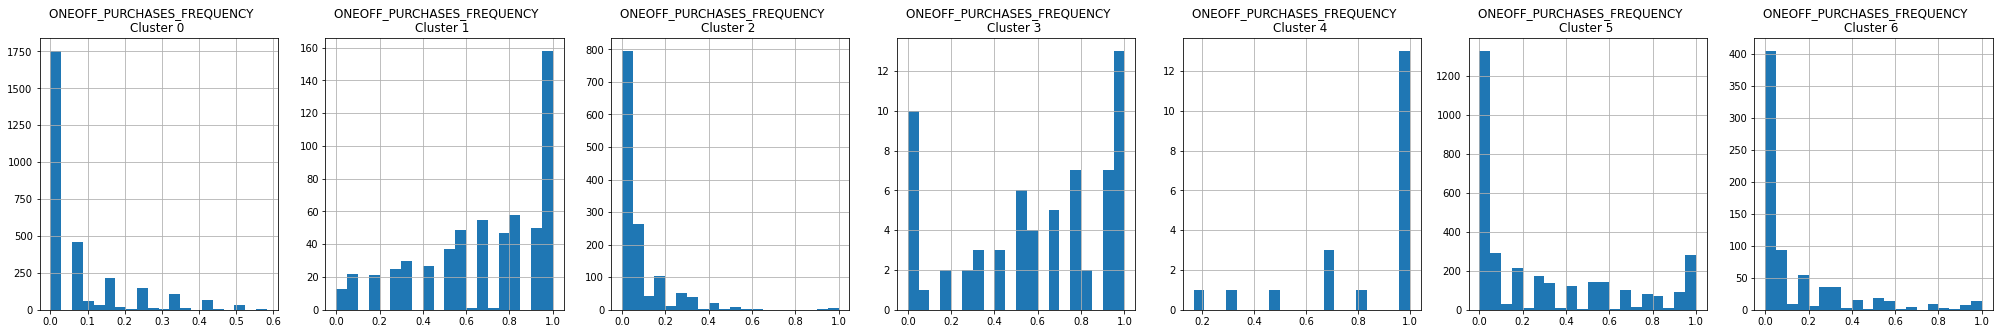

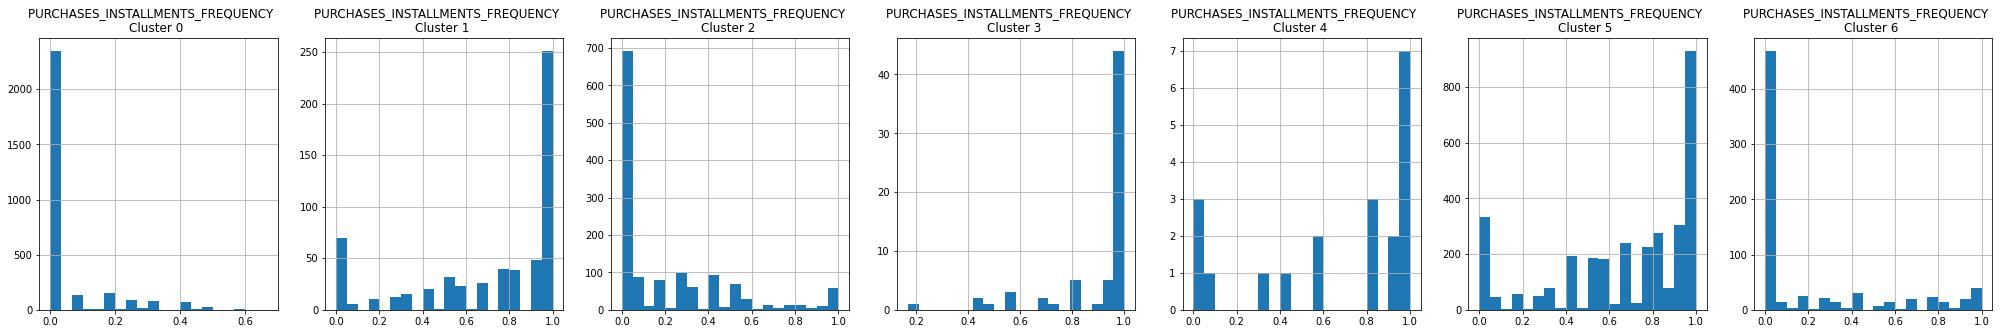

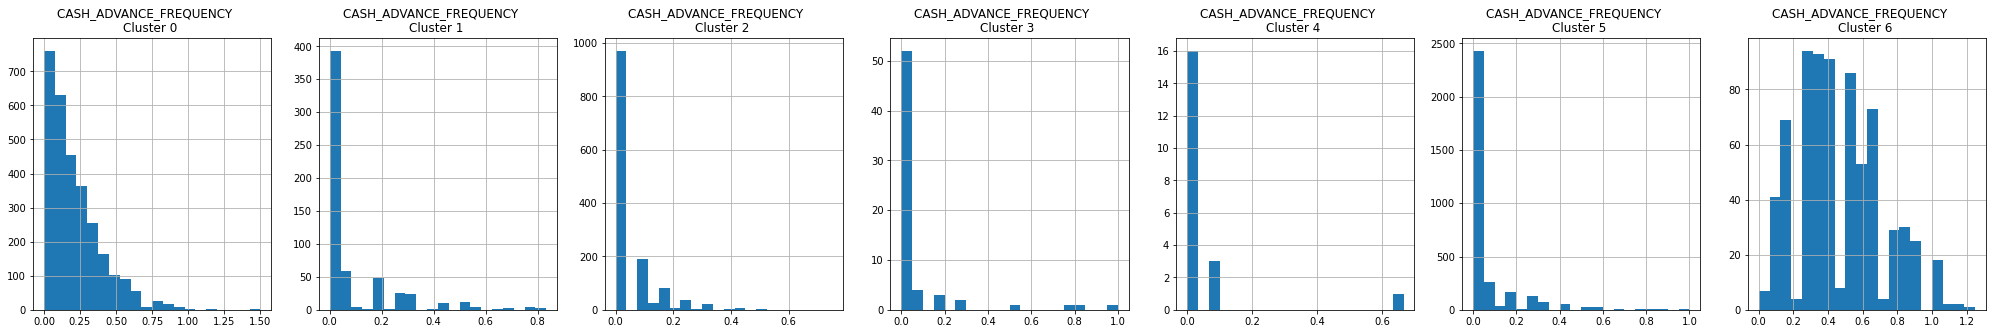

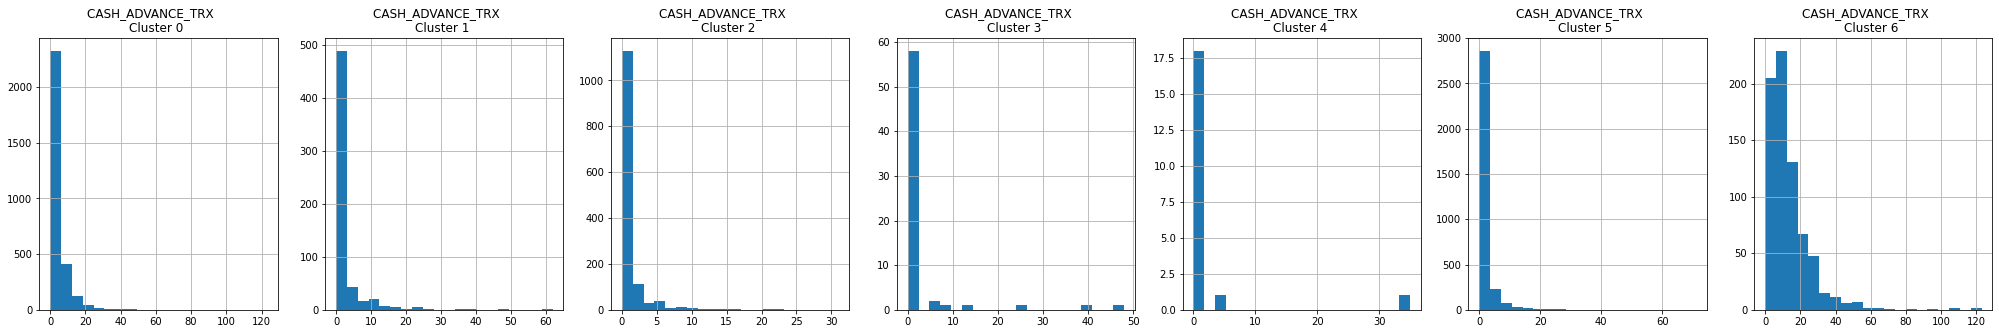

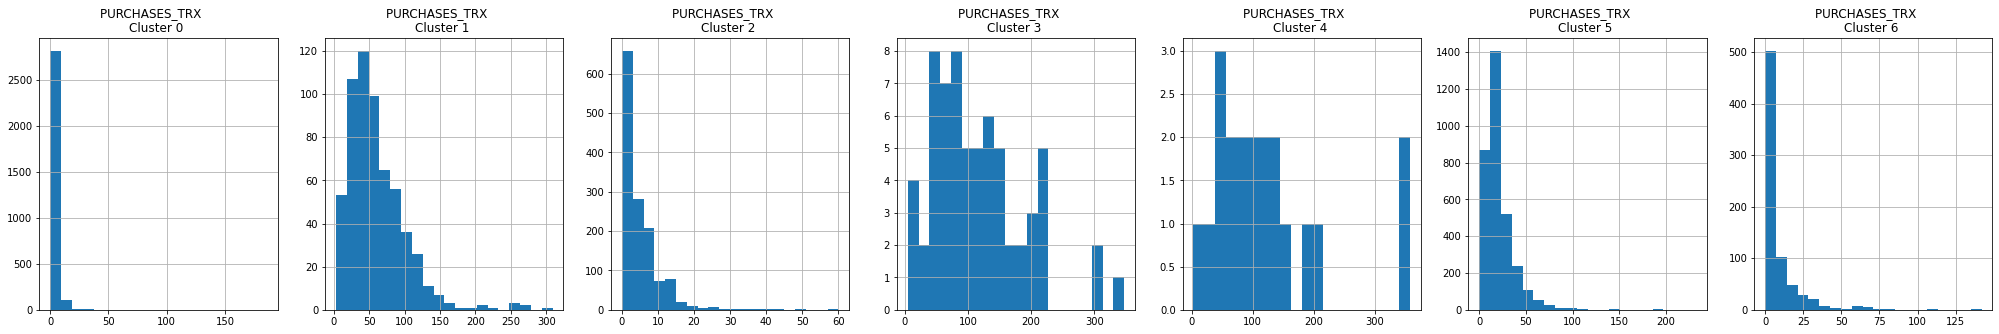

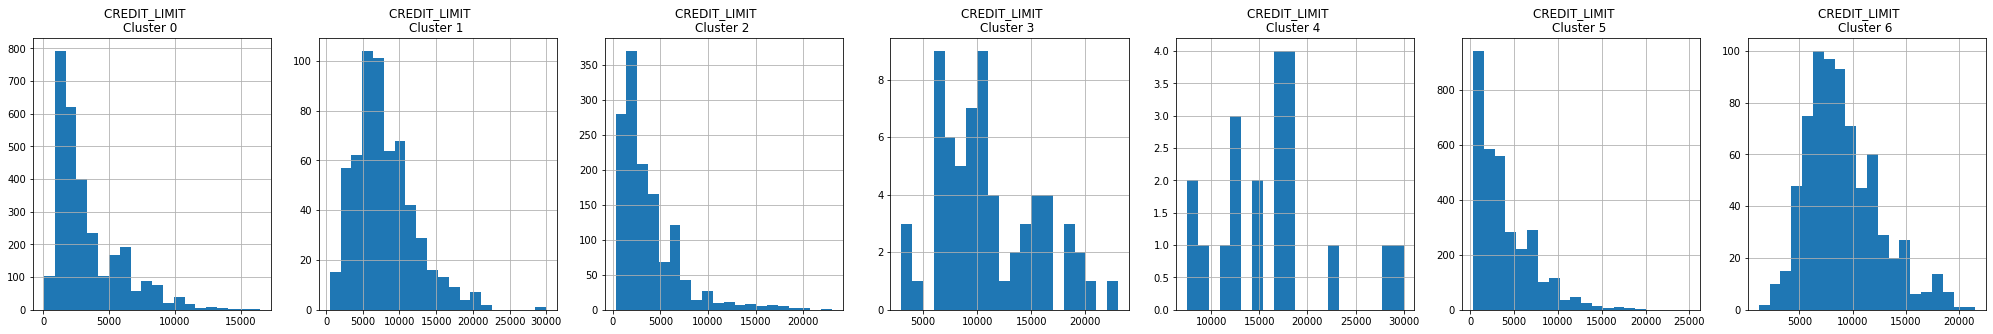

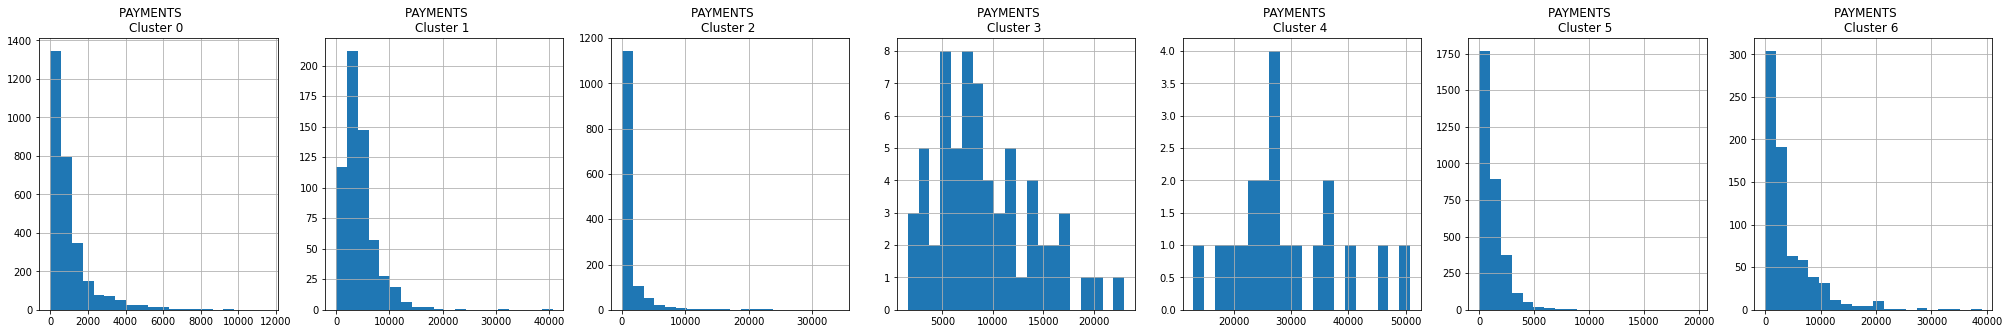

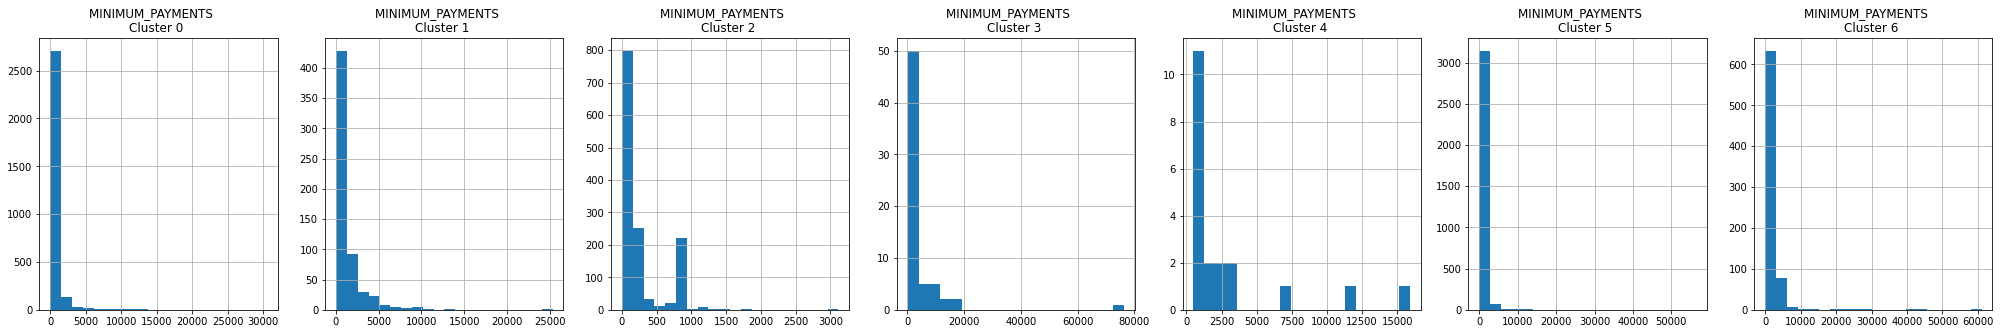

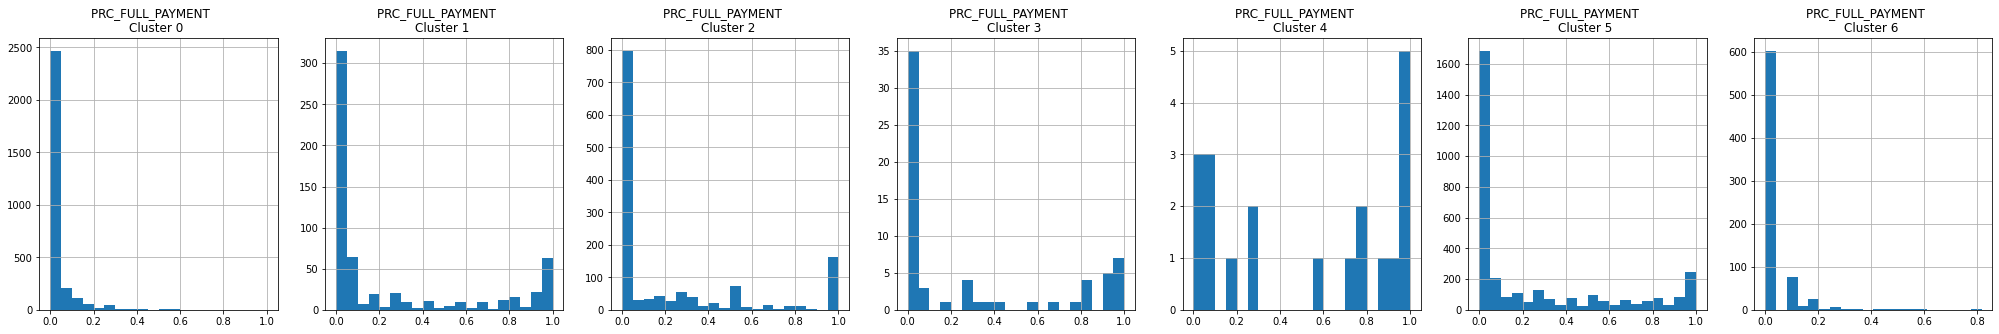

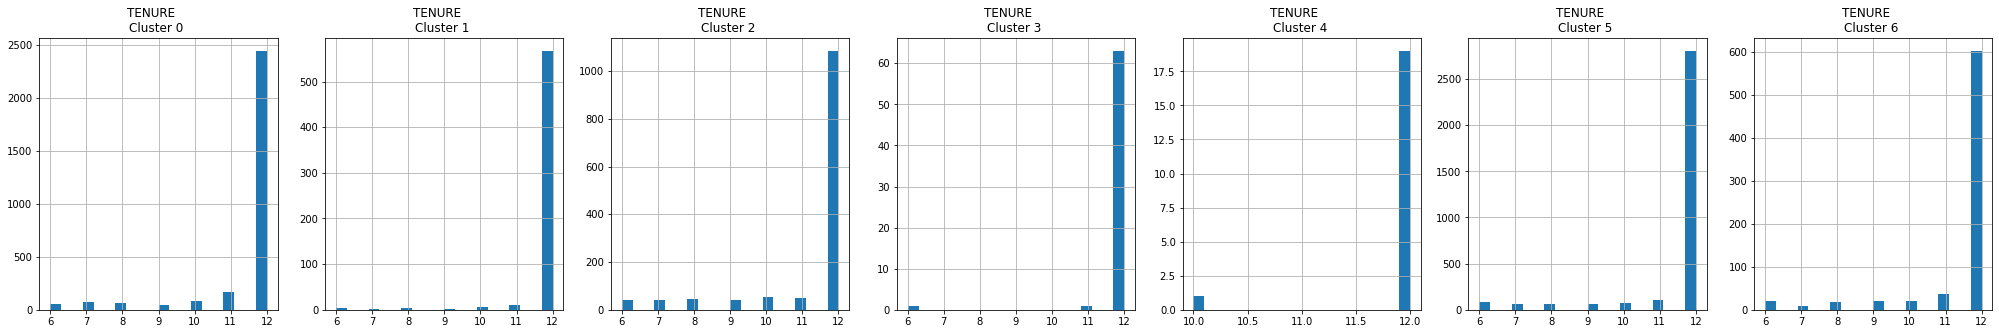

In [ ]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))

  plt.show()



In [ ]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222103, -1.07645414],
       [-1.13829296,  2.506473  ],
       [ 0.96968007, -0.38350125],
       ...,
       [-0.92620516, -1.81079287],
       [-2.3365511 , -0.65797704],
       [-0.55641999, -0.40045847]])

In [ ]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076454
1,-1.138293,2.506473
2,0.969680,-0.383501
3,-0.873629,0.043170
4,-1.599435,-0.688587


In [ ]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076454,0
1,-1.138293,2.506473,6
2,0.969680,-0.383501,5
3,-0.873629,0.043170,2
4,-1.599435,-0.688587,0


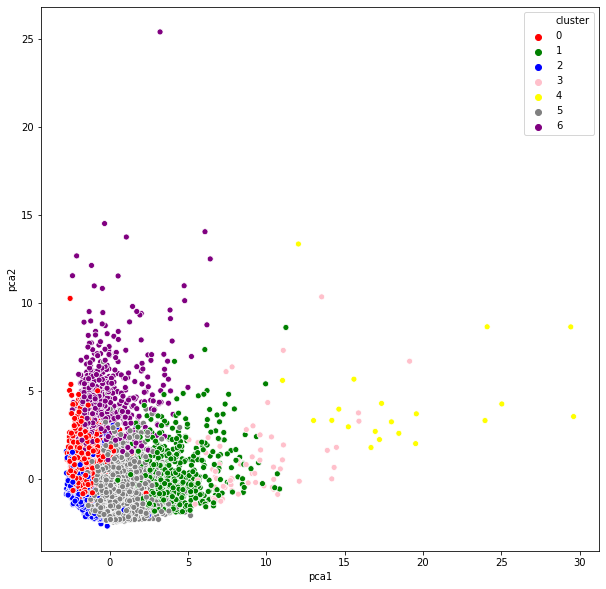

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple'])
plt.show()